<a href="https://colab.research.google.com/github/ysy56/AI/blob/main/%EC%8B%A4%EA%B0%90%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제1_로컬런타임

In [ ]:
# 연습 3-9
import tensorflow as tf

x = tf.constant([0.9, 2.6, 2.3, 1.5, -4.5])
a = tf.round(x)
b = tf.floor(x)
print(a)
print(b)
print(tf.maximum(a, b))
print(tf.cumsum(a, axis=0))
print(tf.math.cumprod(b, axis=0))

tf.Tensor([ 1.  3.  2.  2. -4.], shape=(5,), dtype=float32)
tf.Tensor([ 0.  2.  2.  1. -5.], shape=(5,), dtype=float32)
tf.Tensor([ 1.  3.  2.  2. -4.], shape=(5,), dtype=float32)
tf.Tensor([1. 4. 6. 8. 4.], shape=(5,), dtype=float32)
tf.Tensor([ 0.  0.  0.  0. -0.], shape=(5,), dtype=float32)


# 과제2

In [7]:
import tensorflow as tf

x = [[1., 2., 3.], [3., 2., 1.]]
w = tf.Variable([[1], [2], [3]], dtype=tf.float32)
b = tf.Variable([1], dtype=tf.float32)

y = tf.matmul(x, w)+b
print(y)

tf.Tensor(
[[15.]
 [11.]], shape=(2, 1), dtype=float32)


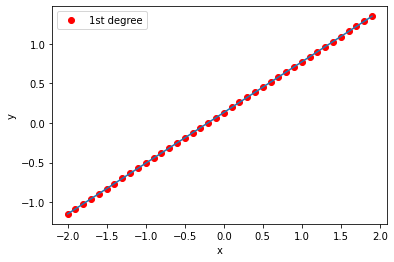

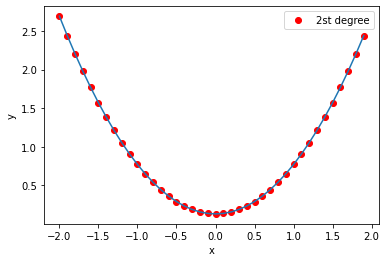

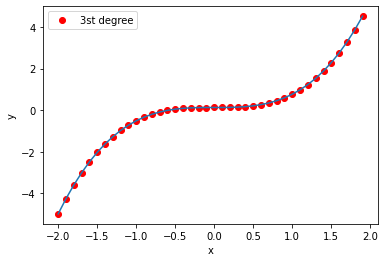

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

x_data = np.arange(-2.0, 2.0, 0.1)

W = tf.Variable(tf.random.normal([1], dtype = tf.float64))
b = tf.Variable(tf.random.normal([1], dtype = tf.float64))

@tf.function
def forward(X1):
  return X1 * W + b

y_data = forward(x_data)
plt.plot(x_data, y_data, 'ro', label='1st degree')
plt.plot(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

y_data2 = forward(x_data*x_data)
plt.plot(x_data, y_data2, 'ro', label='2st degree')
plt.plot(x_data, y_data2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

y_data3 = forward(x_data*x_data*x_data)
plt.plot(x_data, y_data3, 'ro', label='3st degree')
plt.plot(x_data, y_data3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# 과제3 

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adadelta.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


epoch W b cost
0 [0.59995055] [2.0185285] 6.0997157
1 [1.347954] [2.5383077] 2.595314
2 [1.5665445] [2.3832052] 2.1592398
3 [1.7109538] [2.1693354] 1.8213648
4 [1.8409171] [1.9689579] 1.5392812
5 [1.9602656] [1.7846987] 1.3043007
6 [2.0698326] [1.6155852] 1.1090603
7 [2.1702976] [1.460561] 0.9472647
8 [2.2623012] [1.3186257] 0.81354445
9 [2.3464484] [1.1888363] 0.7033326

=== Test ===
X:  5.0 Y:  [12.921079]
X:  2.5 Y:  [7.0549574]


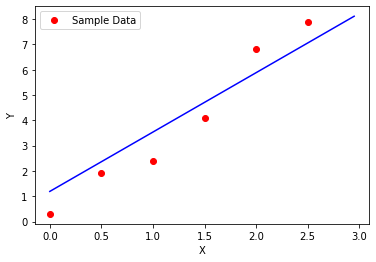

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# X 입력값
# Y X에 대해 예측된 y의 값
X = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
Y = [0.3, 1.9, 2.4, 4.1, 6.8, 7.9]

# W, b를 -1.0~1.0 사이에 균등분포 갖는 Shape 1 의 변수형 텐서로 설정 
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행
# 학습률은 0.1 로 고정 
# optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)
# optimizer = tf.optimizers.RMSprop(lr=0.5) # 0.001
# optimizer = tf.optimizers.Adagrad(lr=1.5) # 0.01
optimizer = tf.optimizers.Adadelta(lr=1000) # 1.0

# 비용 함수 계산 
@tf.function()
def cost_eval():
  # y = W(가중치) * x + b (bias, 편향)
  # W와 X가 행렬이 아니므로 tf.matmul이 아니라 기본 곱셈 기호를 사용 
  hypothesis = W * X + b
  # mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 계산 
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

print("epoch W b cost")

# 최적화를 10번 수행 
for epoch in range(10):
  # 비용을 최소화 하는 것이 최종 목표 
  optimizer.minimize(cost_eval, var_list=[W, b])
  # 손실,가중치, 편향을 출력 
  # numpy()함수는 변수의 배열만 출력 
  print(epoch, W.numpy(), b.numpy(), cost_eval().numpy())
  # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인 

print("\n=== Test ===")
x = 5.
print('X: ', x, 'Y: ', (W * x + b).numpy())
x = 2.5
print('X: ', x, 'Y: ', (W * x + b).numpy())

# 그래프 그리기 위해 새로운 X값 입력 
new_X = tf.range(0, 3, 0.05)
# 선형 회귀직선을 이용하여 예측 Y값 계산
new_Y = W*new_X+b

plt.plot(X, Y, 'ro', label='Sample Data') # 'ro' = red circle
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


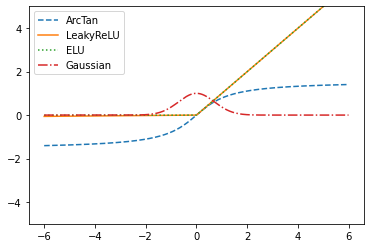

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-6, 6, 0.01)

def arctan_func(x): # ArcTan 함수
    return np.arctan(x)

def leakyrelu_func(x): # Leaky ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
  return (x>=0)*x+(x<0)*0.01*x # 알파값(보통 0.01) 조정가능
  # return np.maximum(0.01*x, x) # 같음 

def elu_func(x): # ELU(Exponential linear unit)
  return (x>=0)*x+(x<0)*0.01*(np.exp(x)-1)

def gaussian_func(x): # Gaussian
  return np.exp(-x*x)  

# 그래프 출력
plt.plot(x, arctan_func(x), linestyle='--', label="ArcTan")
plt.plot(x, leakyrelu_func(x), linestyle='-', label="LeakyReLU")
plt.plot(x, elu_func(x), linestyle=':', label="ELU")
plt.plot(x, gaussian_func(x), linestyle='-.', label="Gaussian")
# ===============================
plt.ylim(-5, 5)
plt.legend()
plt.show()

In [ ]:
# 연습 5-1

import numpy as np
import tensorflow as tf

def arctan_func(x): # ArcTan 함수
    return np.arctan(x)

def leakyrelu_func(x): # Leaky ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
  return (x>=0)*x+(x<0)*0.01*x # 알파값(보통 0.01) 조정가능
  # return np.maximum(0.01*x, x) # 같음 

def elu_func(x): # ELU(Exponential linear unit)
  return (x>=0)*x+(x<0)*0.01*(np.exp(x)-1)

def gaussian_func(x): # Gaussian
  return np.exp(-x*x)  


x = np.array([[1, 1], [1, 0], [0, 1], [0, 0]]) # 입력값
# y = np.array([[1], [0], [0], [0]]) # AND 출력값
y = np.array([[1], [1], [1], [0]]) # OR 출력값 

w = tf.random.normal([2], 0, 1) # 초기 가중치 
b = 1.0 # 바이어스 초기값 
w0 = 0.5 # 바이어스 초기 가중치 
a = 0.1 # 학습률 

# 1000회 반복 
for i in range(1000):
  error_sum = 0
  for j in range(4): # 특징값 4개에 대해 실시 
    # output = arctan_func(np.sum(x[j]*w)+b*w0) # arctan 예측값 계산
    # output = leakyrelu_func(np.sum(x[j]*w)+b*w0) # leakyrelu 예측값 계산
    # output = elu_func(np.sum(x[j]*w)+b*w0) # arctan 예측값 계산
    output = gaussian_func(np.sum(x[j]*w)+b*w0) # gaussian 예측값 계산
    error = y[j][0] - output # 오차 계산 
    w = w + x[j] * a * error # 학습률과 오차를 이용한 가중치 갱신
    w0 = w0 + a * error # 바이어스 갱신
    error_sum += error # 오차 누적 

    if i % 4 == 0: # 4번씩 건너뛰며 오차 출력 
      print(i, error_sum)

  # 학습후, 추출된 W와 b를 기반으로 하여 AND와 OR 모델 테스트
  for i in range(4):
    # if arctan_func(np.sum(x[i]*w)+b*w0) > 0.5:
    # if leakyrelu_func(np.sum(x[i]*w)+b*w0) > 0.5:
    # if elu_func(np.sum(x[i]*w)+b*w0) > 0.5:
    if gaussian_func(np.sum(x[i]*w)+b*w0) > 0.5:
      output=1.0
    else:
      output=0.0
    # print('X:', x[i], 'Y:', y[i], 'Output:', arctan_func(np.sum(x[i]*w)+b*w0), 'result:', output)
    # print('X:', x[i], 'Y:', y[i], 'Output:', leakyrelu_func(np.sum(x[i]*w)+b*w0), 'result:', output)
    # print('X:', x[i], 'Y:', y[i], 'Output:', elu_func(np.sum(x[i]*w)+b*w0), 'result:', output)
    print('X:', x[i], 'Y:', y[i], 'Output:', gaussian_func(np.sum(x[i]*w)+b*w0), 'result:', output)

0 0.10016196347171424
0 0.6542623862151823
0 0.6547307781164748
0 -0.07159269964918247
X: [1 1] Y: [1] Output: 0.8567524639090767 result: 1.0
X: [1 0] Y: [1] Output: 0.4156772148323318 result: 0.0
X: [0 1] Y: [1] Output: 0.9974131767165431 result: 1.0
X: [0 0] Y: [0] Output: 0.784356231292053 result: 1.0
X: [1 1] Y: [1] Output: 0.7901516299135068 result: 1.0
X: [1 0] Y: [1] Output: 0.3572330245511227 result: 0.0
X: [0 1] Y: [1] Output: 0.9988621870297723 result: 1.0
X: [0 0] Y: [0] Output: 0.7822808523612484 result: 1.0
X: [1 1] Y: [1] Output: 0.6869023088353231 result: 1.0
X: [1 0] Y: [1] Output: 0.28490096704801743 result: 0.0
X: [0 1] Y: [1] Output: 0.9999693016557993 result: 1.0
X: [0 0] Y: [0] Output: 0.7684146504294869 result: 1.0
X: [1 1] Y: [1] Output: 0.5327067902069855 result: 1.0
X: [1 0] Y: [1] Output: 0.20034789802702596 result: 0.0
X: [0 1] Y: [1] Output: 0.9936757953480952 result: 1.0
X: [0 0] Y: [0] Output: 0.7357020279524692 result: 1.0
4 0.4672932097930145
4 1.3105954

# 플립러닝1

tf.Tensor(
[ -5.2660065   -8.535263     5.671381    -1.4636213   -6.2745595
   1.8009033   10.092467    -1.9461185   -1.6227157   -1.2979655
 -10.2910185   -4.479028     4.7246413   -1.7614042   -8.0938015
  -1.3406943    7.9595757   -9.788608     7.803835     4.1053944
   1.8575972    5.3721924   -0.1661486    2.3318686   11.85926
   0.44945952  -6.188779    -0.68207985   0.19269258  -2.5740013
  10.15808      4.8479853   -1.8459314    0.6206386    3.8318892
   1.8388593   -0.6318172   -7.41631     -1.59338     -2.0421603
 -11.685686     2.3728356    0.26353383   0.5360277    6.908646
   4.7678857    7.6367717   -1.1499479   -5.132803     2.6335166
  -2.7500906   -5.2070265    2.2062345   -0.7497788   -0.59113955
  -0.3771716   -1.1904981    6.1271663    6.4341574   -2.0787761
   3.4037333   -5.2843103   -6.783246     0.94430804  -4.4357777
   4.351619     2.8645415   -3.7469854   -8.72084      3.1322064
  -0.549684     9.082496    -2.3671048   -4.1525292   -4.1529217
  -3.561138    -

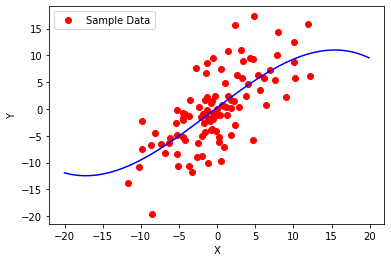

In [9]:
# 연습 4-3 비선형회귀
# Hypothesis : f(x) = a0 + a1x + a2x^2

import tensorflow as tf
import matplotlib.pyplot as plt

X = tf.random.normal([100], mean=0.0, stddev=5)
noise = tf.random.normal([100], mean=0.0, stddev=5)
Y = X + noise
print(X, Y)

a0 = tf.Variable(tf.random.normal([1], mean=0.0))
a1 = tf.Variable(tf.random.normal([1], mean=0.0))
a2 = tf.Variable(tf.random.normal([1], mean=0.0))
a3 = tf.Variable(tf.random.normal([1], mean=0.0))
'''
a0 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a1 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a2 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
a3 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
'''

# optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer = tf.optimizers.Adam(learning_rate=0.07, beta_1=0.9, beta_2=0.999,
                                epsilon=1e-08, amsgrad=False, name='Adam')
# optimizer = tf.optimizers.SGD(learning_rate=0.1)

@tf.function()
def cost_eval():
  # y = a0 + a1x + a2x^2 + a3x^3(3차 함수)
  # W와 X가 행렬이 아니므로 tf.matmul이 아니라 기본 곱셈 기호를 사용
  # hypothesis = a0 + a1x + a2x^2 + a3x^3
  hypothesis = a0+a1*X+(a2*(X**2))+(a3*(X*X*X))
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

print("epoch  a0  a1  a2  cost")
# 최적화를 10번 수행
for epoch in range(0, 1000, 1):
  # 손실 함수를 작성
  # mean(h - Y)^2: 예측값과 실제값의 거리를 비용(손실) 함수로 계산

  # 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 최적화를 수행
  # 비용을 최소화 하는 것이 최종 목표
  optimizer.minimize(cost_eval, var_list=[a0, a1, a2, a3])
  # 손실, 가중치, 편향을 출력
  if epoch % 50 == 0:
    print(epoch, a0.numpy(), a1.numpy(), a2.numpy(), a3.numpy(), cost_eval().numpy())
  # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인

# 그래프 그리기 위해 새로운 X값을 입력
new_X = tf.range(-20, 20, 0.1)
# 선형 회귀직선을 이용하여 예측 Y값 계산
new_Y = a0+a1*new_X+(a2*(new_X**2))+(a3*(new_X*new_X*new_X))

plt.plot(X, Y, 'ro', label='Sample Data') # 'ro'는 red circle
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# 플립러닝2

In [4]:
import io
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import files #colab라이브러리에서 file 대한 모듈만 가져옴
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras

# 파일 업로드를 위한 딕셔너리 객체를 반환(키:파일이름, 값: 업로드된 데이터)
# 해당 파일은 코랩의 메모리에 임시 저장됨
uploaded = files.upload()
filename= ''
for fn in uploaded.keys():
  print('User uploaded file "{name}" with {length} bytes'.format(name=fn, length=len(uploaded[fn]))) #파일 이름과 파일 크기 얻어와 출력
  filename=fn
  
# 파일 읽어와서 파싱하기
data = np.loadtxt(io.StringIO(uploaded[filename].decode('utf-8')), delimiter=',', skiprows=1, unpack=True, dtype=np.float32)
x_data = np.transpose(data[1:5]) #첫번째 행부터 4개
y_data = np.transpose(data[5:]) #다섯째 행부터 마지막 행까지

model = tf.keras.Sequential()
model.add(Dense(input_dim=4, units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# optimizers 왜 안되냐..
model.summary()

history = model.fit(x_data, y_data, epochs=100, batch_size=10)
# 전체 모델을 HDF5 파일로 저장합니다
model.save('/content/drive/MyDrive/colab_test/test.h5')


Saving Iris-training.csv to Iris-training (3).csv
User uploaded file "Iris-training.csv" with 3092 bytes
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                50        
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 20)                220       
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 3)                 18        
               

In [5]:
import tensorflow as tf
import numpy as np
import os # 체크 포인트 경로 설정을 위한 라이브러리
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras

data = np.loadtxt('/content/drive/MyDrive/colab_test/Iris-test.csv', delimiter=',', skiprows=1, unpack=True, dtype=np.float32)
x_data = np.transpose(data[1:5]) #첫번째 행부터 4개
y_data = np.transpose(data[5:]) #다섯째 행부터 마지막 행까지

new_model = keras.models.load_model("/content/drive/MyDrive/colab_test/test.h5")
new_model.summary()

loss, acc = new_model.evaluate(x_data, y_data, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                50        
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 20)                220       
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 3)                 18        
                                                                 
Total params: 663
Trainable params: 663
Non-trainable 

# 플립러닝3


170498071/170498071 [==============================] - 2s 0us/step


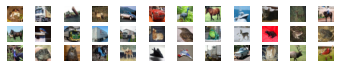

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                      

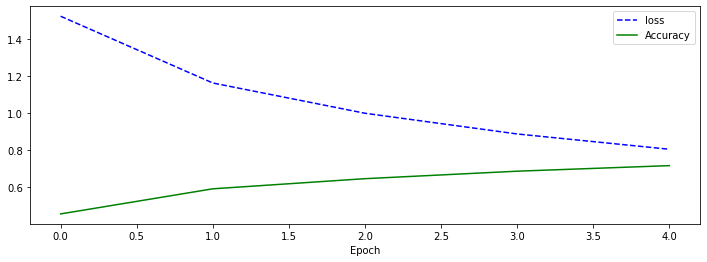

최적화 완료!

=====test result=====
313/313 [==============================] - 1s 2ms/step
313/313 - 1s - loss: 1.0175 - accuracy: 0.6729 - 741ms/epoch - 2ms/step

 Accuracy: 0.6729


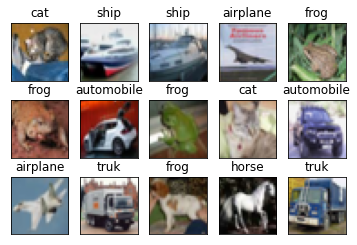

In [6]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# MNIST 데이터셋을 로드하여 준비. 샘플 값을 정수에서 부동소수로 변환

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truk']

import matplotlib.pylab as plt

plt.figure(figsize=(6,1))
for i in range(36):
  plt.subplot(3, 12, i+1)
  plt.imshow(train_images[i], cmap="brg")
  plt.axis("off")
plt.show()

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
train_images, test_images = train_images/255.0, test_images/255.0

from keras.utils import to_categorical

# 층을 차례대로 쌓아 tf.keras.Sequential 모델을 만든다..
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid', strides=(1,1), input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization()) # Dropout보다 정확도가 더 높다.
#model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))


model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) # Dropout보다 정확도가 더 높다.
#model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) # Dropout보다 정확도가 더 높다.
# model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)
plt.figure(figsize=(12,4)) # 그래프의 가로세로 비율
plt.subplot(1,1,1) # 1행1열의 첫 번째 위치
plt.plot(history.history['loss'], 'b--', label='loss') # loss는 파란색 점선
plt.plot(history.history['accuracy'], 'g-', label='Accuracy') # accuracy는 녹색실선
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')

print('\n=====test result=====')
labels=model.predict(test_images)
# verbose=2로 설정하여 진행 막대(progress bar)가 나오지 않도록 설정한다.
print('\n Accuracy: %.4f' % (model.evaluate(test_images, test_labels, verbose=2)[1]))
# [0]: loss, [1]: accuracy

fig=plt.figure()
for i in range(15):
  subplot=fig.add_subplot(3, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % class_name[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape((32, 32, 3)), cmap=plt.cm.brg)
plt.show()

# 해커톤


CNN을 이용한 MNIST 분류

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_40 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_65 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 64)      

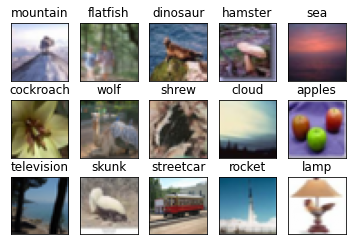

In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Reshape, Flatten

from keras.utils import to_categorical

# cifar10 데이터셋을 로드하여 준비
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()
# CIFAR-100 클래스
CIFAR100_CLASSES = sorted(['beaver', 'dolphin', 'otter', 'seal', 'whale',  # aquatic mammals
                           'aquarium' 'fish', 'flatfish', 'ray', 'shark', 'trout',  # fish
                           'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', # flowers
                           'bottles', 'bowls', 'cans', 'cups', 'plates', # food containers
                           'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', # fruit and vegetables
                           'clock', 'computer' 'keyboard', 'lamp', 'telephone', 'television', # household electrical devices
                           'bed', 'chair', 'couch', 'table', 'wardrobe', # household furniture
                           'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', # insects
                           'bear', 'leopard', 'lion', 'tiger', 'wolf', # large carnivores
                           'bridge', 'castle', 'house', 'road', 'skyscraper', # large man-made outdoor things
                           'cloud', 'forest', 'mountain', 'plain', 'sea', # large natural outdoor scenes
                           'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', # large omnivores and herbivores
                           'fox', 'porcupine', 'possum', 'raccoon', 'skunk', # medium-sized mammals
                           'crab', 'lobster', 'snail', 'spider', 'worm', # non-insect invertebrates
                           'baby', 'boy', 'girl', 'man', 'woman', # people
                           'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', # reptiles
                           'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', # small mammals
                           'maple', 'oak', 'palm', 'pine', 'willow', # trees
                           'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', # vehicles 1
                           'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor' # vehicles 2
                          ])

# 픽셀값 0~1로 정규화
train_images = train_images.reshape((50000,32,32,3))
test_images = test_images.reshape((10000,32,32,3))
train_images, test_images = train_images / 255.0, test_images / 255.0

# 데이터 보강
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range=20,
                         shear_range=0.2,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         horizontal_flip=True)

augment_ratio = 1.5 # 전체 데이터의 150%
augment_size = int (augment_ratio * train_images.shape[0])

randidx = np.random.randint(train_images.shape[0], size=augment_size)

x_augmented = train_images[randidx].copy() # copy 사용해 원본 데이터 복사본 만듬
y_augmented = train_labels[randidx].copy()

x_augmented, y_augmented = gen.flow(x_augmented, y_augmented,
                                    batch_size=augment_size,
                                    shuffle=False).next()

train_images = np.concatenate((train_images, x_augmented))     
train_labels = np.concatenate((train_labels, y_augmented))       

s = np.arange(train_images.shape[0]) # 보강된 학습데이터, 정답 데이터를 랜덤하게 섞음
np.random.shuffle(s)

train_images = train_images[s]
train_labels = train_labels[s]

# 데이터 레이블 one hot 코드 변경
one_hot_train_labels = to_categorical(train_labels, 100)
one_hot_test_labels = to_categorical(test_labels, 100)

model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', strides=(1, 1), input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization()) # Dropout보다 정확도가 더 높다.

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization()) # Dropout보다 정확도가 더 높다.

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization()) # Dropout보다 정확도가 더 높다.
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization()) # Dropout보다 정확도가 더 높다.
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization()) # Dropout보다 정확도가 더 높다.

model.add(Reshape(target_shape = (256, 1*1)))
model.add(LSTM(300, input_shape = (16, 5*5), return_sequences = True))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=64, validation_split=0.2)

print("\n=============test results==========")
labels=model.predict(test_images)
print("\n Accuracy: %.4f" % (model.evaluate(test_images,one_hot_test_labels)[1]))
print("===================================")

import matplotlib.pylab as plt

fig=plt.figure()
for i in range(15):
  subplot=fig.add_subplot(3, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % CIFAR100_CLASSES[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape((32, 32, 3)), cmap=plt.cm.brg)
plt.show()